In [11]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Load the labeled dataset
data = pd.read_csv('ExpenseData2.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['Item'], data['Category'], test_size=0.2, random_state=42)

# Convert the item descriptions to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


with open('./vec.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)


# Train an SVM classifier
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
with open('./model.pkl', 'wb') as file2:
    pickle.dump(clf, file2)

file.close()
file2.close()
# Evaluate the classifier on the test set
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)



# Use the classifier to predict the category of new items


Accuracy: 0.9534691174035437


In [12]:
with open('./model.pkl', 'rb') as file3:
    model = pickle.load(file3)
with open('./vec.pkl', 'rb') as file4:
    vec = pickle.load(file4)

y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion = confusion_matrix(y_test, y_pred)
print('Confusion matrix:', confusion)

Confusion matrix: [[ 789    3   81    0    6    0]
 [   4  361   74    0    8    0]
 [  22    9 4492    0    9    0]
 [   0    5    4    0    0    0]
 [   4    7   41    0  114    0]
 [   1    1    2    0    0    2]]


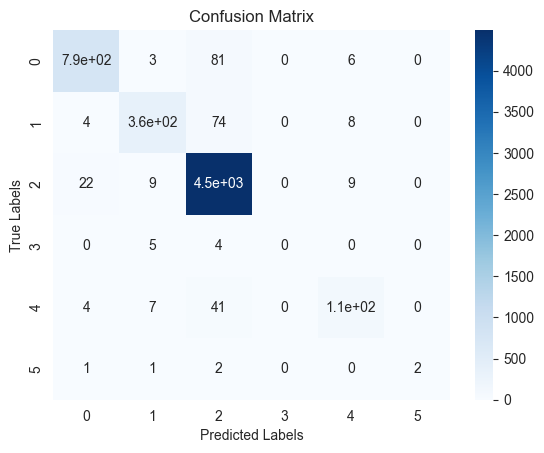

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [9]:

with open('./model.pkl', 'rb') as file3:
    model = pickle.load(file3)
with open('./vec.pkl', 'rb') as file4:
    vec = pickle.load(file4)

new_items = ["Aspirin tablets", "Baked beans", "English dictionary"]
X_new = vec.transform(new_items)
predictions = model.predict(X_new)
print("Predictions:", predictions)

Predictions: ['Medical' 'Medical' 'Medical']
